In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

In [11]:
# 加載 MNIST 數據
(x_train1, y_train1), (x_test1, y_test1) = mnist.load_data()

# 正規化並重塑數據
# x_train = x_train1[0:100].astype('float32') / 255.
y_test = y_test1 [0:100]
x_test = x_test1[0:100].astype('float32') / 255.
x_train = x_train1[0:5000].astype('float32') / 255.
# x_test = x_test1.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
# x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape)
print(x_test.shape)

(5000, 784)
(100, 784)


In [12]:
# n = 10  # 顯示幾個數字
# plt.figure(figsize=(20, 4))
# for i in range(n):
#     # 顯示原始數據
#     ax = plt.subplot(2, n, i + 1)
#     plt.imshow(x_test[i].reshape(28, 28))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)

# plt.show()

In [13]:
# Auto-encoder model
from keras.models import Model
from keras.layers import Input, Dense
from tensorflow.keras.models import Sequential

# # 使用 Sequential 建立編碼器
encoder = Sequential([
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),  # 使用整數除法確保單元數為整數
    Dense(8, activation='linear')
    # Dense(2, activation='linear')
])

# 使用 Sequential 建立解碼器
decoder = Sequential([
    # Dense(8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(input_dim, activation='sigmoid')
])

# 定義輸入層的維度
input_dim = x_train.shape[1]  # 784
input_layer = Input(shape=(input_dim,))
encoded_output = encoder(input_layer)
decoded_output = decoder(encoded_output)
autoencoder = Model(inputs=input_layer, outputs=decoded_output)
autoencoder.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy')


In [14]:
# # 定義輸入層的維度
# input_dim = x_train.shape[1]  # 784

# # 創建輸入層
# input_layer = Input(shape=(784,))

# # 創建編碼層
# encoded = Dense(128, activation='relu')(input_layer)
# encoded = Dense(64, activation='relu')(encoded)
# encoded = Dense(32, activation='relu')(encoded)  # 編碼後的特徵

# # 創建解碼層
# decoded = Dense(64, activation='relu')(encoded)
# decoded = Dense(128, activation='relu')(decoded)
# decoded = Dense(input_dim, activation='sigmoid')(decoded)  # 重建的輸出

# # 定義 autoencoder 模型
# autoencoder = Model(input_layer, decoded)

# # 定義編碼器模型
# encoder = Model(input_layer, encoded)

# # 定義解碼器模型
# encoded_input = Input(shape=(32,))
# decoder_layer = autoencoder.layers[-3](encoded_input)
# decoder_layer = autoencoder.layers[-2](decoder_layer)
# decoder_layer = autoencoder.layers[-1](decoder_layer)
# decoder = Model(encoded_input, decoder_layer)


In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_checkpoint = ModelCheckpoint('UNet_Membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
history = autoencoder.fit(x_train, x_train, 
                epochs=20, 
                batch_size=128, 
                shuffle=True, 
                callbacks=[model_checkpoint],
                validation_data=(x_test, x_test))


Epoch 1/20
39/40 [============================>.] - ETA: 0s - loss: 0.5287
Epoch 1: loss improved from inf to 0.52833, saving model to UNet_Membrane.hdf5
40/40 [==============================] - 1s 17ms/step - loss: 0.5283 - val_loss: 0.2972
Epoch 2/20
38/40 [===========================>..] - ETA: 0s - loss: 0.2818
Epoch 2: loss improved from 0.52833 to 0.28146, saving model to UNet_Membrane.hdf5
40/40 [==============================] - 0s 11ms/step - loss: 0.2815 - val_loss: 0.2672
Epoch 3/20
39/40 [============================>.] - ETA: 0s - loss: 0.2663
Epoch 3: loss improved from 0.28146 to 0.26625, saving model to UNet_Membrane.hdf5
40/40 [==============================] - 0s 10ms/step - loss: 0.2663 - val_loss: 0.2602
Epoch 4/20
36/40 [==========================>...] - ETA: 0s - loss: 0.2566
Epoch 4: loss improved from 0.26625 to 0.25623, saving model to UNet_Membrane.hdf5
40/40 [==============================] - 0s 11ms/step - loss: 0.2562 - val_loss: 0.2503
Epoch 5/20
33/40 [==

In [16]:
# autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')
# history = autoencoder.fit(x_train, x_train, 
#                 epochs=200, 
#                 batch_size=256, 
#                 shuffle=True, 
#                 validation_data=(x_test, x_test))


In [17]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

4/4 [==============================] - 0s 9ms/step


In [ ]:
## comparing the original image and decoder image
# n = 10  # 顯示幾個數字
# plt.figure(figsize=(20, 4))
# for i in range(n):
#     # 顯示原始數據
#     ax = plt.subplot(2, n, i + 1)
#     plt.imshow(x_test[i].reshape(28, 28))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)

# #     顯示重建數據
#     ax = plt.subplot(2, n, i + 1 + n)
#     plt.imshow(decoded_imgs[i].reshape(28, 28))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
# plt.show()

In [18]:
# 假设 x_test 是你的测试数据集
encoded_imgs = encoder.predict(x_test)

4/4 [==============================] - 0s 8ms/step


In [19]:
from sklearn.decomposition import PCA

# 初始化 PCA，设置降维后的主成分数为2
pca = PCA(n_components=2)
encoded_imgs_2d = pca.fit_transform(encoded_imgs)  # 对编码后的图片应用PCA


Text(0.5, 1.0, 'PCA of Encoded Images with Labels')

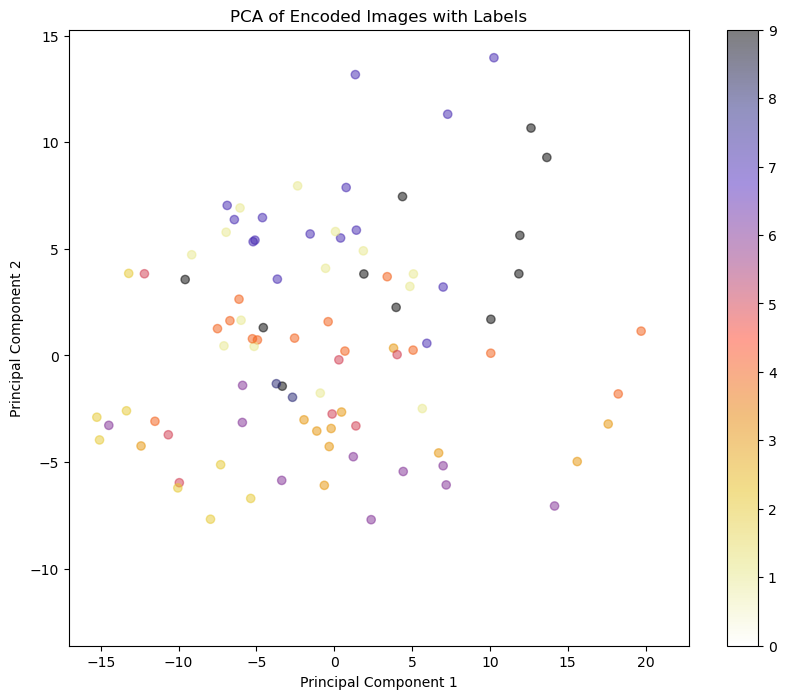

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
scatter = plt.scatter(encoded_imgs_2d[:, 0], encoded_imgs_2d[:, 1], c=y_test, cmap='CMRmap_r', alpha=0.5)
plt.colorbar(scatter)  # 显示颜色条
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Encoded Images with Labels')
